<a href="https://colab.research.google.com/github/OlofGotting/Conceptual-Metaphoric-Paraphraser/blob/main/CNN_for_Fashion_MNIST_Clothing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By Olof Gotting

In this notebook I will be training a Convolution Neural Network (CNN) to classify photos of fashion items from the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist). In addition I'll be running some experiments on the Neural network and write about my findings.

What's the problem we are looking for a solution for here?

The hypothetical problem being dealt with here is that we are a missing a reliable method of labeling low-resolution images of fashion items.

Collect data. 


In [ ]:
# import necessary packages
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist


# collect data
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
mnist_dicto = {0: 'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker',
               8: 'Bag',
               9: 'Ankle boot'}



Explore and visualize data.

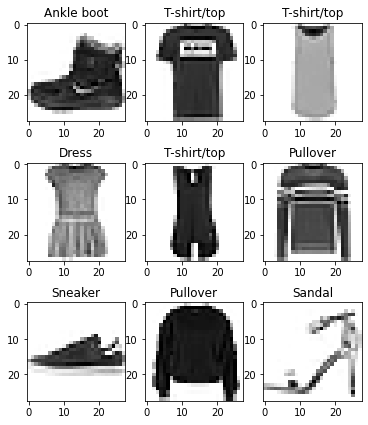

In [ ]:
for i in range(9):
  # print the image and category of the first 9 fashion items
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.title(mnist_dicto[y_train[i]])
  plt.subplots_adjust(top=1.5)


Prepare data for learning.




In [ ]:
'''
Normalization
'''
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

'''
Splitting the training data to create a validation set.
'''
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=len(y_test), random_state=42)



Choose a model and train it.

In [ ]:
model = tf.keras.Sequential()
''' 
The convolution layer.
Here, the model finds patterns in the image through convolution.
'''
model.add(tf.keras.layers.Conv2D(# The filters argument sets the number of filtered images being stacked.
                                 # Every such filter has specific values for each pixel. 
                                 filters=64,
                                 # kernel_size sets the dimensins of the convolution window.                                   
                                 kernel_size=2,
                                 # padding='same' adds extra pixels around the image.
                                 padding='same', 
                                 # The activation argument decides the layer's activation function.
                                 activation='relu',
                                 # input_shape is the dimensions of the image. (28*28 pixels, 1 color dimension) 
                                 input_shape=(28,28,1))) 
'''
Pooling reduces the size of the image by extracting only the most important information.
pool_size sets the dimensions of the pooling kernel.
'''
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Flatten())
'''
The dense layer.
Deeply connected layer. 
Each neuron in the previous layer feeds information into each neuron of this layer.
'''
model.add(tf.keras.layers.Dense(#The first argument sets the number of neurons in the dense layer. 
                                256, activation='relu'))

# In the dropout layer input units are randomly set to 0
model.add(Dropout(0.25))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
'''
Compilation
'''
model.compile( 
  # The optimizer changes the learning rate throughout the training.
  optimizer='adam',
  # The loss function measures how well the model fits the data.
  loss='sparse_categorical_crossentropy',
  # The function with which the model's performarance is judged.
  metrics=['accuracy'])


In [ ]:
'''
Training
'''
model.fit(x_train, y_train,
          # batch_ size sets how many samples passes through the network per run.
          batch_size=32,
          # epochs: how many times the whole training data is cycled through
          epochs=10,
          verbose=1,
          validation_data=(x_validation, y_validation))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/10
1563/1563 [==============================] - 15s 9ms/step - loss: 0.4859 - accuracy: 0.8197 - val_loss: 0.3277 - val_accuracy: 0.8777
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3210 - accuracy: 0.8819 - val_loss: 0.2931 - val_accuracy: 0.8910
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2775 - accuracy: 0.8966 - val_loss: 0.2778 - val_accuracy: 0.8949
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2470 - accuracy: 0.9080 - val_loss: 0.2683 - val_accuracy: 0.8990
Epoch 5/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.2205 - accuracy: 0.9190 - val_loss: 0.2605 - val_accuracy: 0.9065
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1997 - accuracy: 0.9236 - val_loss: 0.2508 - val_accuracy: 0.9079
Epoch 7/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1769 - accuracy: 0.9340 - val_loss: 0.2413 - val_ac

**Discussion**

After some experimentation I came up with this model that gets close to 90% accuracy.\
It will be used as the baseline.  

<details>
<summary>Baseline model:</summary>

```
Conv2D(filters=256, kernel_size=2, padding='same', activation='relu')
MaxPooling2D(pool_size=2))
Conv2D(filters=128, kernel_size=2, padding='same', activation='relu')
MaxPooling2D(pool_size=2))
Flatten())
Dense(64, activation='relu'))
Dense(32, activation='relu'))
Dense(10, activation='softmax'))

#compilation
optimizer='adam',
loss='sparse_categorical_crossentropy'
metrics=['accuracy']

#training
batch_size=32,
epochs=10
```
<br>
</details>

loss ≈0.335\
accuracy ≈0.899,\

<hr />



<details>
<summary>Iteration 2</summary>

```
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
MaxPooling2D(pool_size=2))
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
MaxPooling2D(pool_size=2))
Flatten())
Dense(64, activation='relu'))
Dense(32, activation='relu'))
Dense(10, activation='softmax'))

#compilation
optimizer='adam',
loss='sparse_categorical_crossentropy'
metrics=['accuracy']

#training
batch_size=32,
epochs=10
```
<br>
</details>

Decreasing the number of filters in both convolutional layers to 64 yields similar results:\
loss ≈0.301\
accuracy ≈0.899,\
This change does however make the program run considerably faster, so I'll keep it this way.

<hr />



<details>
<summary>Iteration 3</summary>

```
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
Flatten())
Dense(64, activation='relu'))
Dense(32, activation='relu'))
Dense(10, activation='softmax'))

#compilation
optimizer='adam',
loss='sparse_categorical_crossentropy'
metrics=['accuracy']

#training
batch_size=32,
epochs=10
```
<br>
</details>

Now, removing both the pooling filters yields:\
loss: ≈0.584\
accuracy: ≈0.894,\
The validation loss now goes up for each epoch and ends up being way higher than the training loss. This is an indication that the model is overfitting. 


<hr />

I'll try adding in a dropout layer after each convolution layer to see if that mitigates overfitting.

<details>
<summary>Iteration 4</summary>

```
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
Dropout(0.25)
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
Dropout(0.25)
Flatten())
Dense(64, activation='relu'))
Dropout(0.25)
Dense(32, activation='relu'))
Dropout(0.25)
Dense(10, activation='softmax'))

#compilation
optimizer='adam',
loss='sparse_categorical_crossentropy'
metrics=['accuracy']

#training
batch_size=32,
epochs=10
```
<br>
</details>

Loss ≈0.311\
Accuracy ≈0.897

This did help with the overfitting and yielded slightly better results. [This](https://stats.stackexchange.com/questions/240305/where-should-i-place-dropout-layers-in-a-neural-network) stackexchange thread suggests it might be better to just use dropout after the dense layers. Trying that now.
<hr />

<details>
<summary>Iteration 5</summary>

```
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
Flatten())
Dense(64, activation='relu'))
Dropout(0.25)
Dense(32, activation='relu'))
Dropout(0.25)
Dense(10, activation='softmax'))

#compilation
optimizer='adam',
loss='sparse_categorical_crossentropy'
metrics=['accuracy']

#training
batch_size=32,
epochs=10
```
<br>
</details>

Removing the dropout from after the convolution layers made the overfitting worse again. But it increased the accuracy, which is now over 90 for the first time.\
Loss ≈0.376\
Accuracy ≈0.904

<hr />

Let's put the Pooling layers back in.

<details>
<summary>Iteration 6</summary>

```
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
MaxPooling2D(pool_size=2))
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
MaxPooling2D(pool_size=2))
Flatten())
Dense(64, activation='relu'))
Dropout(0.25)
Dense(32, activation='relu'))
Dropout(0.25)
Dense(10, activation='softmax'))

#compilation
optimizer='adam',
loss='sparse_categorical_crossentropy'
metrics=['accuracy']

#training
batch_size=32,
epochs=10
```
<br>
</details>

This mitigated the overfitting, but made the accuracy worse.

Loss ≈0.295\
Accuracy ≈0.899

<hr />

Widening the CNN might improve accuracy. Setting the number of neurons in the deep dense layers to 256.

<details>

<summary>Iteration 7</summary>

```
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
MaxPooling2D(pool_size=2))
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
MaxPooling2D(pool_size=2))
Flatten())
Dense(256, activation='relu'))
Dropout(0.25)
Dense(256, activation='relu'))
Dropout(0.25)
Dense(10, activation='softmax'))

#compilation
optimizer='adam',
loss='sparse_categorical_crossentropy'
metrics=['accuracy']

#training
batch_size=32,
epochs=10
```
<br>
</details>

Loss ≈0.292\
Accuracy ≈0.912

<hr />

Will making the CNN deeper make it better as well?\
Adding in two more dense layers with 256 neurons in each, and a dropout layer after each.

<details>
<summary>Iteration 8</summary>



```
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
MaxPooling2D(pool_size=2))
Conv2D(filters=64, kernel_size=2, padding='same', activation='relu')
MaxPooling2D(pool_size=2))
Flatten())
Dense(256, activation='relu'))
Dropout(0.25)
Dense(256, activation='relu'))
Dropout(0.25)
Dense(10, activation='softmax'))

#compilation
optimizer='adam',
loss='sparse_categorical_crossentropy'
metrics=['accuracy']

#training
batch_size=32,
epochs=10
```
<br>
</details>

Loss ≈0.297977089881897 \
Accuracy ≈0.9089999794960022

That actually made it worse. My suspicion is that this is because the data has features that are relatively easy to detect, and therefore a simpler NN might be preferable. I'm sticking with iteration 7 when doing the following experiments. 
<hr />

Running the program 3 different times yields slightly different results each time:

<u>First run</u>\
Loss ≈0.292\
Accuracy ≈0.912

<u>Second run</u>\
Loss ≈0.280\
Accuracy ≈0.908

<u>Third run</u>\
Loss: 0.3133\
Accuracy: 0.903

Why?\
Randomness is a feature of neural networks. According to [this](https://machinelearningmastery.com/different-results-each-time-in-machine-learning/) article, the difference in results hinges on the fact that the learning algorithm we are dealing with here is stochastic, rather than deterministic. That is, it "incorporates elements of randomness".

Also, the regularization method called Dropout that I used in my CNN is inherently random. From the method's [Keras documentation](https://machinelearningmastery.com/different-results-each-time-in-machine-learning/):  "The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting".

<hr />

The training loss and valuation loss changes during training. The training loss keeps getting better, which is to be expected, because the model learns to generalize over that specific set, getting better at it each epoch. But the validation loss keeps going up from epoch number 5. This is a clear indication of overfitting. The model is finding patterns where there really aren't any. 

<hr />

Different optimizers yield different results.

Changing from 'adam' to 'RMSProp' makes the model perform poorer:\
Loss ≈0.370 \
Accuracy ≈0.870

<hr /> 

Running the code below lets us know that 'Shirt' is the item most often falsely predicted. Printing 30 images where it failed to correctly label images as 'Shirt' we see that these instances are indeed fairly hard to label. Even for me a lot of them are very unclear.\
It does seem like the NN is "focusing" a lot on the edges of the clothing and failing to see some of the patterns on them. This is apparent on the flannel shirts, which to a human would be pretty easy to identify, because of the checkered pattern on them. But if i had to do the labeling task myself, I'm not sure I would have gotten a better percentage than the neural network on this dataset.



Find the item that's most often wrongly classified. 

The most commonly falsely predicted piece of clothing is: Shirt


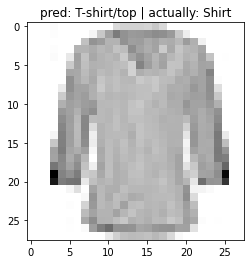

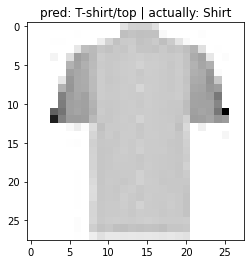

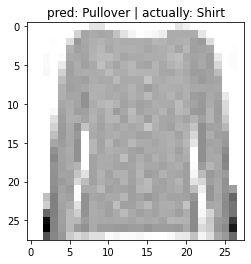

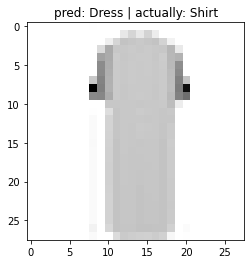

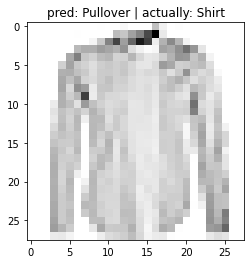

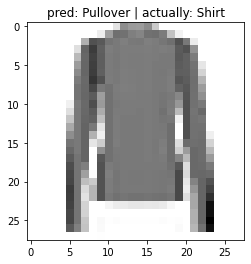

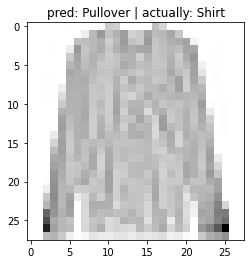

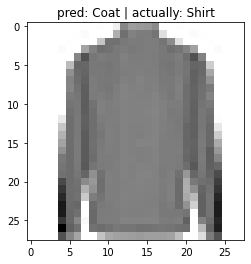

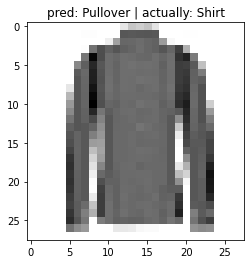

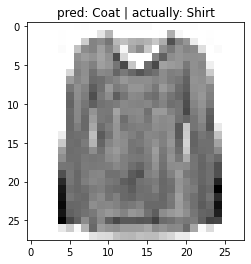

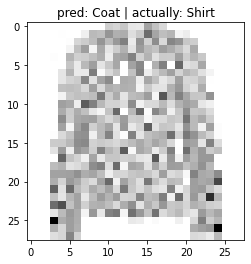

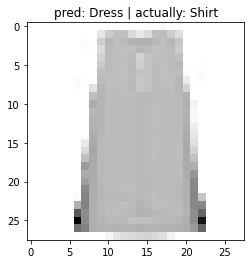

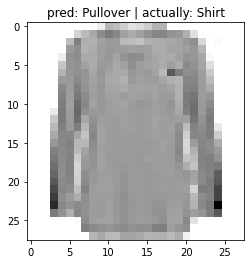

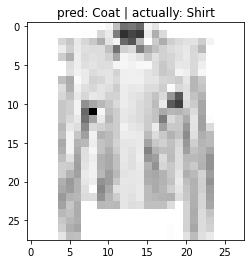

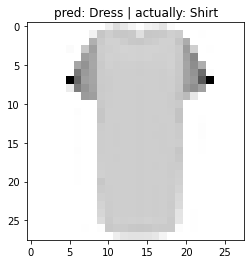

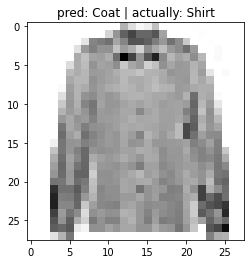

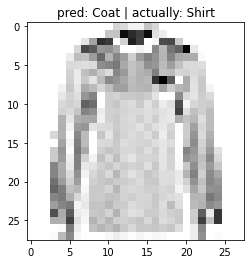

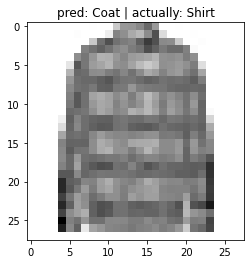

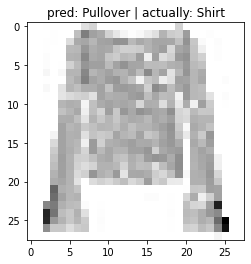

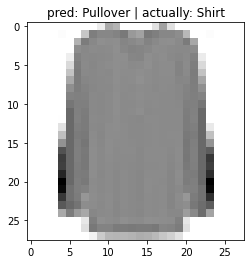

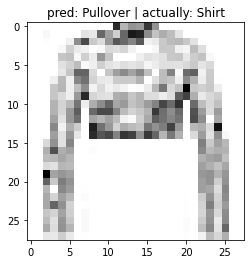

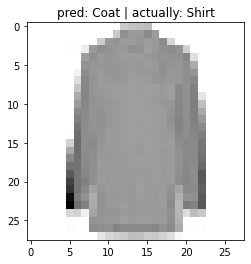

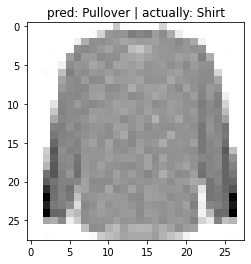

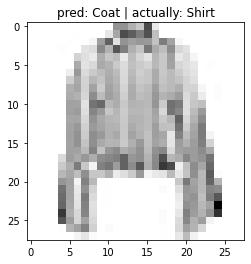

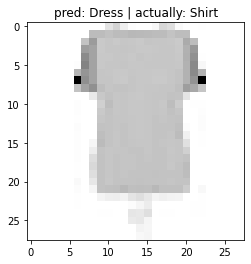

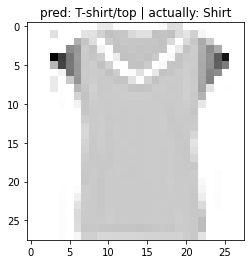

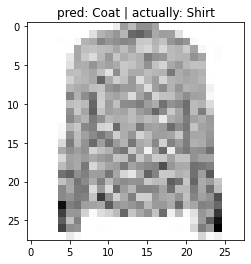

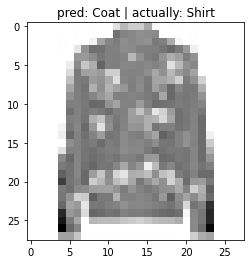

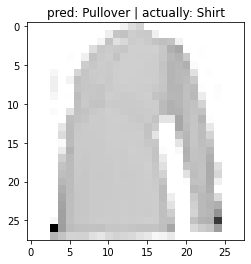

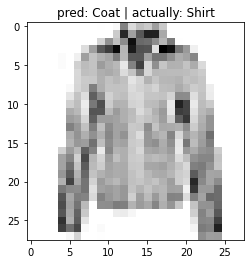

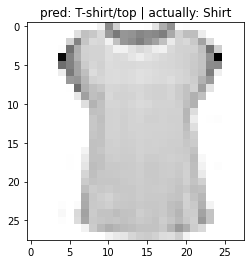

In [ ]:
from collections import Counter
probability_distributions = model.predict(x_test)
predictions = np.argmax(probability_distributions, axis=1)
fail_counter = Counter()

for prediction, actual in zip(predictions, y_test):
  if prediction != actual:
    fail_counter.update([actual])

most_commonly_falsely_predicted = fail_counter.most_common()[0][0]
print('The most commonly falsely predicted piece of clothing is:', mnist_dicto[most_commonly_falsely_predicted])

i = -1
n_of_images = 0
for image, target, prediction in zip(x_test, y_test, predictions):
  i += 1
  if ((target == most_commonly_falsely_predicted) and (target != prediction)):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(str('pred: ' + mnist_dicto[predictions[i]] + ' | actually: ' + mnist_dicto[y_test[i]]))
    plt.show()
    n_of_images += 1

  if n_of_images > 30:
    break


